## irisデータの分類問題

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import Sequential
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
x, t = load_iris(return_X_y=True)
print('x:', x.shape)
print('t:', t.shape)

x: (150, 4)
t: (150,)


In [3]:
x = x.astype('float32')
t = t.astype('int32')

In [4]:
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=0)

In [5]:
l = L.Linear(4, 3)

In [6]:
n_input = 4
n_hidden = 10
n_output = 3

net = Sequential(
L.Linear(n_input, n_hidden), F.relu,
L.Linear(n_hidden, n_hidden), F.relu,    
L.Linear(n_hidden, n_output)
)

In [7]:
optimizer = chainer.optimizers.SGD(lr=0.01)
optimizer = optimizer.setup(net)

In [8]:
n_epoch = 30
n_batchsize = 16

In [9]:
iteration = 0

results_train = {
    'loss': [],
    'accuracy': []
}
results_valid = {
    'loss': [],
    'accuracy': []
}


for epoch in range(n_epoch):

    order = np.random.permutation(range(len(x_train)))

    loss_list = []
    accuracy_list = []

    for i in range(0, len(order), n_batchsize):
        index = order[i:i+n_batchsize]
        x_train_batch = x_train[index,:]
        t_train_batch = t_train[index]

        y_train_batch = net(x_train_batch)

        # ソフトマックス関数を適用後、交差交差エントロピーを計算
        loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
        accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)

        loss_list.append(loss_train_batch.array)
        accuracy_list.append(accuracy_train_batch.array)

        net.cleargrads()
        loss_train_batch.backward()

        optimizer.update()

        iteration += 1

    loss_train = np.mean(loss_list)
    accuracy_train = np.mean(accuracy_list)

    with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
        y_val = net(x_val)

    # ソフトマックス関数を適用後、交差交差エントロピーを計算
    loss_val = F.softmax_cross_entropy(y_val, t_val)
    accuracy_val = F.accuracy(y_val, t_val)

    print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(
        epoch, iteration, loss_train, loss_val.array))

    results_train['loss'] .append(loss_train)
    results_train['accuracy'] .append(accuracy_train)
    results_valid['loss'].append(loss_val.array)
    results_valid['accuracy'].append(accuracy_val.array)

epoch: 0, iteration: 5, loss (train): 1.3141, loss (valid): 1.3062
epoch: 1, iteration: 10, loss (train): 1.2079, loss (valid): 1.2629
epoch: 2, iteration: 15, loss (train): 1.1672, loss (valid): 1.2246
epoch: 3, iteration: 20, loss (train): 1.1256, loss (valid): 1.1884
epoch: 4, iteration: 25, loss (train): 1.0959, loss (valid): 1.1550
epoch: 5, iteration: 30, loss (train): 1.0759, loss (valid): 1.1151
epoch: 6, iteration: 35, loss (train): 1.0514, loss (valid): 1.0683
epoch: 7, iteration: 40, loss (train): 1.0180, loss (valid): 1.0340
epoch: 8, iteration: 45, loss (train): 0.9900, loss (valid): 1.0045
epoch: 9, iteration: 50, loss (train): 0.9705, loss (valid): 0.9831
epoch: 10, iteration: 55, loss (train): 0.9465, loss (valid): 0.9501
epoch: 11, iteration: 60, loss (train): 0.9318, loss (valid): 0.9231
epoch: 12, iteration: 65, loss (train): 0.9009, loss (valid): 0.9050
epoch: 13, iteration: 70, loss (train): 0.8767, loss (valid): 0.8808
epoch: 14, iteration: 75, loss (train): 0.881

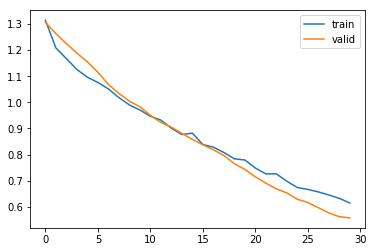

In [10]:
plt.plot(results_train['loss'], label='train')
plt.plot(results_valid['loss'], label='valid')
plt.legend()

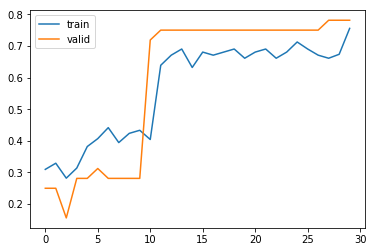

In [11]:
plt.plot(results_train['accuracy'], label='train')  # label で凡例の設定
plt.plot(results_valid['accuracy'], label='valid')  # label で凡例の設定
plt.legend()  

In [12]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    y_test = net(x_test)

In [13]:
accuracy_test = F.accuracy(y_test, t_test)
accuracy_test.array

array(0.6, dtype=float32)

In [14]:
loaded_net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

In [15]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    y_test = loaded_net(x_test)

In [16]:
np.argmax(y_test[0,:].array)

2